In [1]:
import matplotlib.pyplot as plt

# Introduction to Ensemble Methods

Ensemble methods are techniques for obtaining better predictive performances by using multiple models.

To get an overview of the methods we are going to see today, you can watch this video of Machine learnia about Ensemble learning : https://www.youtube.com/watch?v=7C_YpudYtw8 (you don't need to understand everything before beginning the notebook ;)).

The following dataset comes from a bank which would like to know when a new client arrives if this client will subscribe to a long term deposit.

The bank will be considered as your client in the following parts.

---

**Feel free to create sklearn Pipelines for simplifying the following experiments** 

## Introducing and exploring the dataset

The dataset is located in `../data/bank-full.csv`. It has 17 columns, the target column or $ŷ$ is the column named `y`.

Columns summary  : 

| column name | simple description |
|-------------|------------------------|
| age | age |
| job | type of job |
| marital | marital status |
| education | education level |
| default | has credit in default? |
| balance | average yearly balance, in euros  |
| housing | has housing loan? |
| loan | has personal loan? |
| contact | contact communication |
| month | last contact month of year |
| day_of_week | last contact day of the week |
| duration |  last contact duration in seconds |
| campaign |  number of contacts performed during campaign for this client |
| pday | number of days that passed by after the client was last contacted from a previous campaign (-1 means client was not previously contacted) |
| previous | number of contacts performed before this campaign and for this client |
| poutcome | outcome of the previous marketing campaign |
| **output :** |  |
| y | has  the client subscribed a term deposit? |

Let's explore the dataset a bit using pandas.

While exploring the dataset it is recommended to create a list of categorical features

In [2]:
import pandas as pd

Create a dataframe with the dataset `../data/bank-full.csv`

In [3]:
# code here
df = pd.read_csv('../data/bank-full.csv', sep=';')
y = df['y']
df = df.drop('y', axis=1)

Describe the dataset informations

In [4]:
# code here
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


Use histogramms to display the features' distribution

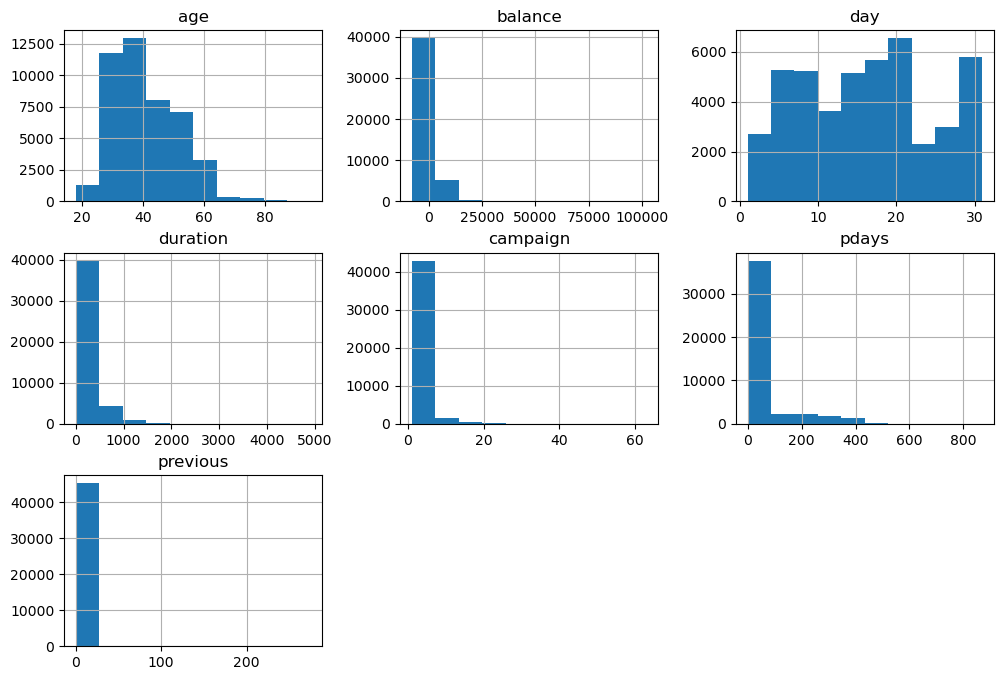

In [7]:
# code here
df.hist(figsize=(12,8))
plt.show()

Use heatmap to display the numerical features' correlation

<Axes: >

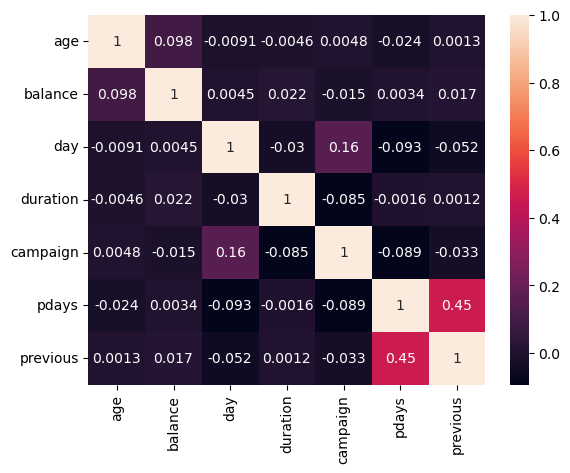

In [8]:
# code here
import seaborn as sns

sns.heatmap(df.select_dtypes(exclude=object).corr(), annot=True, fmt='.2g')

Hop hop hop!!! Not to fast!! Before processing data for machine learning, do you think that all the data are useful?  
As an expert, I tell you you should removed the duration column!!

Could you tell me why?

💡*think first, but if you have no idea double click here.*
<!-- When do your calls last the most? --> 

In [9]:
# remove duration column
df = df.drop('duration', axis=1)

The date is a strange type of data for machine learning. Think about it. Is the day? the month? the year that are important? Or the relative date for instance in the year?

If the phenomenon occurs seasonally, maybe it is better to look at the day of the year (on 365 days), if it monthly, maybe to look at the day in the month (on approximativally 30, 31 or other for bissextile year), etc... If more complex, well do the proper hypothesis and test it.

For our problem, we supposed it is better to look at the day of the year. Maybe it is a good hypothesis, maybe not. It is an hypothesis we want you to test. So in order to continue the preprocessing, the features `day` and `month` should be merged into one column named `dayoftheyear`. 

You can use pandas datetime tools or python **datetime** librairies for doing this preprocessing. To find the the day of year, look as *dayofyear* method from **datetime** library and examples such as https://pythonguides.com/extract-day-number-of-the-year-from-a-date-in-python/ or https://docs.lucee.org/reference/functions/dayofyear.html
(the default year used will be 1984)

In [10]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown


In [11]:
#code here
# You can concatenate multiple Series containing string by just summing them.
# However, be sure each Serie contains string, in case use .astype(str)
import datetime

df['dayoftheyear'] = pd.to_datetime('1984' + '-' + df['month'] + '-' + df['day'].astype(str), format='%Y-%b-%d')
df['dayoftheyear'] = df['dayoftheyear'].dt.dayofyear.astype(int)
df = df.drop(columns=['month', 'day'], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,dayoftheyear
0,58,management,married,tertiary,no,2143,yes,no,unknown,1,-1,0,unknown,126
1,44,technician,single,secondary,no,29,yes,no,unknown,1,-1,0,unknown,126
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,-1,0,unknown,126
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,1,-1,0,unknown,126
4,33,unknown,single,unknown,no,1,no,no,unknown,1,-1,0,unknown,126


We cannot treat the same way categories with numerical features. So let's make two different lists and different treatments. 

Now sort the features into categorical and numerical features

In [12]:
df.isna().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
campaign        0
pdays           0
previous        0
poutcome        0
dayoftheyear    0
dtype: int64

In [13]:
df.nunique()

age               77
job               12
marital            3
education          4
default            2
balance         7168
housing            2
loan               2
contact            3
campaign          48
pdays            559
previous          41
poutcome           4
dayoftheyear     318
dtype: int64

In [14]:
df.select_dtypes(include=object).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome'],
      dtype='object')

In [15]:
df.select_dtypes(exclude=object).columns

Index(['age', 'balance', 'campaign', 'pdays', 'previous', 'dayoftheyear'], dtype='object')

In [16]:
 # to be completed
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 
                        'loan', 'contact', 'poutcome']

numerical_features = ['age', 'balance', 'campaign', 'pdays', 'previous', 'dayoftheyear'] 

After a first exploration, categorical/ordinal features (8 columns) need to be encoded in order to become a valid input for the modeling phase. ML manipulates figures, not string, not category by itself.

Look at the encoder to *encode* your *categorical data*. The different encoders can be found [here](https://scikit-learn.org/stable/api/sklearn.preprocessing.html).

(You can also use the function `gethg_dummies` of pandas for categorical features)

In [17]:
# Create the X and y DataFrames resample the dataframes if necessary
from sklearn.model_selection import train_test_split
y = y.map({'yes': 1, 'no': 0})

# train_test split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=42)

In [18]:
# import and create the appropriate transformers 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])

# Fusion dans un seul transformateur
preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_features),
    ('cat', cat_pipeline, categorical_features)
])

At the end of this part, two dataframes are created :

- `X` containing the features (or the matrix $X$)
- `y` containing the label (or $ŷ$)

Well done! The data is now ready to be splitted into sets and used to train models!

## Modelling phase

The client needs two features :

1. A model, which can be updated without performance loss. In other word, it means a pipeline easy to use and evaluate.
2. A model, that performs well.

### Dummy Classifier

It is always a good idea to begin with a dummy model as a baseline

In [19]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, accuracy_score

# Code here to get dummy classifier F1score and accuracy

model_d = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', DummyClassifier(strategy='most_frequent'))
])

model_d.fit(X_train, y_train)
y_pred_test = model_d.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy score:', accuracy)
f1 = f1_score(y_test, y_pred_test)
print('F1 score:', f1)

Accuracy score: 0.8802972662125099
F1 score: 0.0


### Simple Decision Tree

We will experiment both feature by doing the two following steps.

* Training the Decision Tree model with various splits of the dataset (change the `seed` parameter of the `train_test_split` function for obtaining the second dataset)
* The decision tree `max_depth` will be fixed at 3 first

if you need more info you can take a look at the [sklearn decision tree doc](https://scikit-learn.org/stable/modules/tree.html).

In [41]:
# Decision tree model creation and tree visualization
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# train_test split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=41)


model_dt = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=3, class_weight='balanced'))
])

model_dt.fit(X_train, y_train)
y_pred_test = model_dt.predict(X_test)

In [42]:
model_dt.named_steps['preprocessing'].get_feature_names_out()

array(['num__age', 'num__balance', 'num__campaign', 'num__pdays',
       'num__previous', 'num__dayoftheyear', 'cat__job_admin.',
       'cat__job_blue-collar', 'cat__job_entrepreneur',
       'cat__job_housemaid', 'cat__job_management', 'cat__job_retired',
       'cat__job_self-employed', 'cat__job_services', 'cat__job_student',
       'cat__job_technician', 'cat__job_unemployed', 'cat__job_unknown',
       'cat__marital_divorced', 'cat__marital_married',
       'cat__marital_single', 'cat__education_primary',
       'cat__education_secondary', 'cat__education_tertiary',
       'cat__education_unknown', 'cat__default_yes', 'cat__housing_yes',
       'cat__loan_yes', 'cat__contact_cellular', 'cat__contact_telephone',
       'cat__contact_unknown', 'cat__poutcome_failure',
       'cat__poutcome_other', 'cat__poutcome_success',
       'cat__poutcome_unknown'], dtype=object)

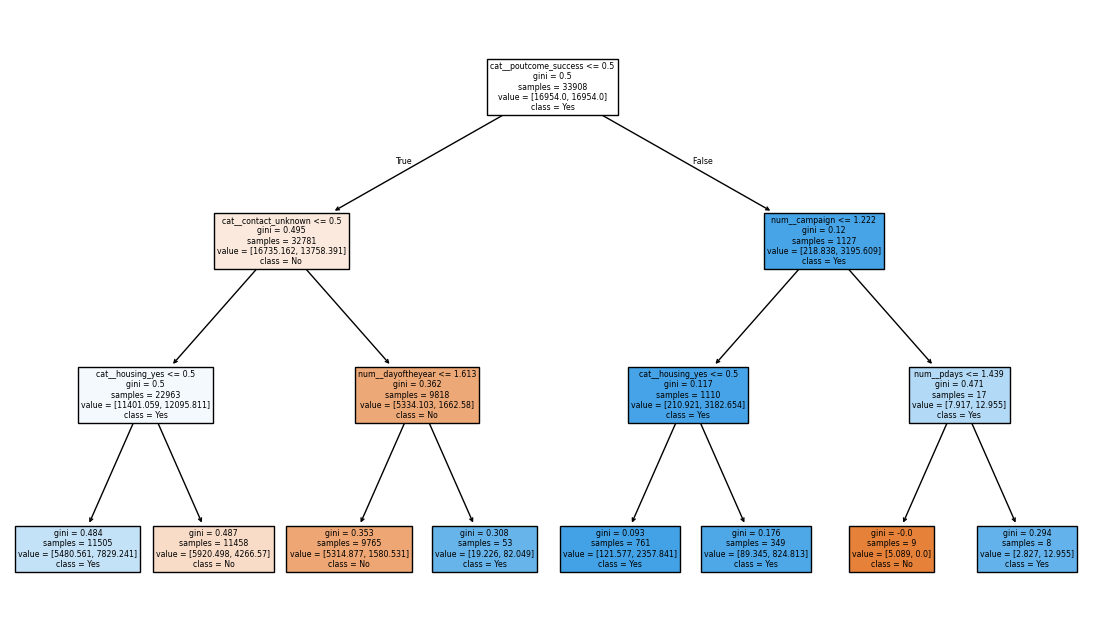

In [43]:
fig, ax = plt.subplots(figsize=(14,8))
tree.plot_tree(model_dt.named_steps['classifier'], 
               feature_names=model_dt.named_steps['preprocessing'].get_feature_names_out(), 
               class_names=['No', 'Yes'], filled=True, ax=ax)
plt.show()

Now, a first model has been created, change the random seed for the train/test split, and create another tree.

This tree should be created with the same hyperparameters than above. 

In [44]:
# create a new train and test dataset with a different seed
# train_test split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=1000)

model_dt.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


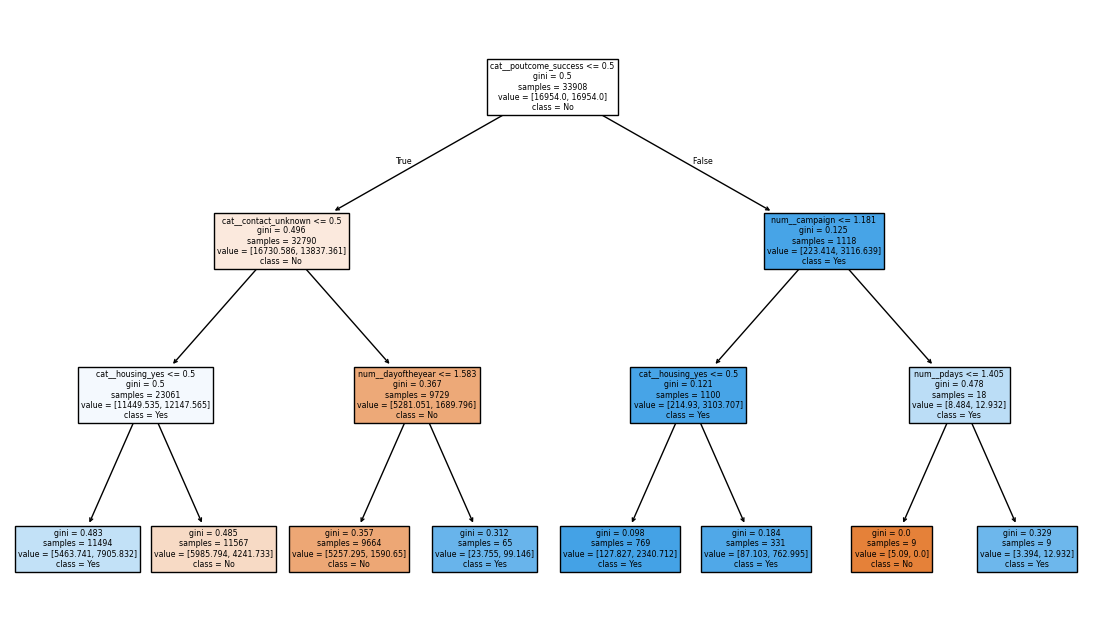

In [45]:
# Second tree creation
fig, ax = plt.subplots(figsize=(14,8))
tree.plot_tree(model_dt.named_steps['classifier'], 
               feature_names=model_dt.named_steps['preprocessing'].get_feature_names_out(), 
               class_names=['No', 'Yes'], filled=True, ax=ax)
plt.show()

What can you tell about the two trees?

The trees are slightly different and the choice for how a node is split changes between the trees. Also, we see that there are a lot more people who are not subscribed to a term deposit than people who are subscribed to a term deposit. Also, there seems to generally be more samples on the left hand side of the split than the right hand side of a split.

Normally, before creating a model, one or more evaluation metrics should be chosen depending on the client problem.

* Choose different metrics that seem relevant to this problem (see previous lesson on Classification)

* Prepare a scoring list for these metrics.

* Use the cross-validation method to measure these metrics (if you need see : [cross validation sklearn](https://scikit-learn.org/stable/modules/cross_validation.html)). 

*Hint:*  the `cross_validate` method allows you to pass a metric list as parameter (see [doc here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) ).

In [46]:
# Test if the target is balanced
y.value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

no, the target is not balanced

In [47]:
from sklearn.metrics import (precision_score, recall_score, accuracy_score, 
                             f1_score, average_precision_score, roc_auc_score)

In [48]:
# Cross validation on Decision trees
from sklearn.model_selection import cross_val_score, cross_validate

metrics = ['accuracy', 'balanced_accuracy', 'precision', 'recall', 
           'f1', 'average_precision', 'roc_auc']

cv_scores = cross_validate(model_dt, X_train, y_train, cv=10, scoring=metrics)

In [49]:
df_cv = pd.DataFrame(cv_scores, columns =cv_scores.keys())
df_cv = df_cv.drop(['fit_time', 'score_time'], axis=1)
df_cv = df_cv.reindex(df_cv.mean().sort_values(ascending=False).index, axis=1)
df_cv

,test_roc_auc,test_accuracy,test_balanced_accuracy,test_recall,test_f1,test_average_precision,test_precision
0,0.708619,0.664111,0.656771,0.647208,0.309278,0.256149,0.203187
1,0.708060,0.666765,0.657170,0.644670,0.310134,0.259523,0.204180
2,0.710986,0.652905,0.657044,0.662437,0.307240,0.272851,0.200000
3,0.712012,0.658213,0.658569,0.659033,0.308885,0.261459,0.201713
4,0.719801,0.666175,0.673022,0.681934,0.321343,0.294566,0.210196
5,0.679750,0.654084,0.634125,0.608142,0.289522,0.267046,0.189984
6,0.736103,0.673843,0.687307,0.704835,0.333735,0.315089,0.218627
7,0.714935,0.661162,0.659132,0.656489,0.309910,0.304928,0.202830
8,0.698560,0.668732,0.660096,0.648855,0.312309,0.255264,0.205645
9,0.698133,0.657817,0.649502,0.638677,0.302046,0.247422,0.197794


Now process the output of your cross-validation in order to know the diversity in performances and the average performance

Bonus : Plot your metrics performance

In [50]:
df_cv_stats = pd.concat([df_cv.mean(), df_cv.std()], axis=1, keys = ['Mean', 'Std'])
df_cv_stats

,Mean,Std
test_roc_auc,0.708696,0.014841
test_accuracy,0.662381,0.006722
test_balanced_accuracy,0.659274,0.013823
test_recall,0.655228,0.025711
test_f1,0.310440,0.011486
test_average_precision,0.273430,0.023231
test_precision,0.203416,0.007527


<Axes: >

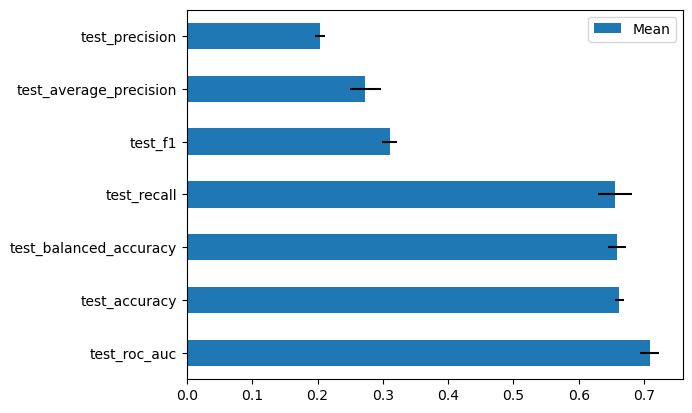

In [51]:
# BONUS: performance plot 
# Create a bar plot showing the mean and the standard deviation for each metric
df_cv_stats.plot(kind='barh', y='Mean', xerr='Std')

Now choose a single metric to perform a grid search on the `max_depth` of the tree.

In [52]:
# Grid search
from sklearn.model_selection import GridSearchCV

depth = range(5,51,5)
param_grid =  {'classifier__max_depth': depth}

#TOFILL
gs_dt = GridSearchCV(estimator=model_dt, 
                     param_grid=param_grid, 
                     scoring = 'f1',
                     n_jobs = -1,
                     cv = 5
                    )

gs_dt.fit(X_train, y_train)

,estimator,Pipeline(step...ax_depth=3))])
,param_grid,"{'classifier__max_depth': range(5, 51, 5)}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [53]:
gs_dt_results = pd.DataFrame(gs_dt.cv_results_).sort_values('rank_test_score')
gs_dt_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.370681,0.021895,0.058309,0.000422,5,{'classifier__max_depth': 5},0.407470,0.441948,0.415939,0.450932,0.412903,0.425838,0.017274,1
1,0.438024,0.009228,0.056901,0.003997,10,{'classifier__max_depth': 10},0.443175,0.417029,0.393557,0.401160,0.375000,0.405984,0.022991,2
2,0.527177,0.009624,0.055588,0.006190,15,{'classifier__max_depth': 15},0.378405,0.380056,0.364626,0.357231,0.337850,0.363634,0.015457,3
3,0.591014,0.013497,0.053580,0.001420,20,{'classifier__max_depth': 20},0.342369,0.325948,0.322434,0.329445,0.302632,0.324566,0.012871,4
4,0.729477,0.136352,0.117485,0.098449,25,{'classifier__max_depth': 25},0.326369,0.307013,0.324561,0.341237,0.276091,0.315054,0.022302,5
5,0.680362,0.123010,0.055128,0.004488,30,{'classifier__max_depth': 30},0.332090,0.290206,0.314233,0.339041,0.270204,0.309155,0.025773,6
6,0.623252,0.019210,0.055113,0.003277,35,{'classifier__max_depth': 35},0.321839,0.291349,0.314650,0.332147,0.279974,0.307992,0.019399,7
8,0.611231,0.014697,0.054856,0.004218,45,{'classifier__max_depth': 45},0.326531,0.284444,0.317089,0.329958,0.280337,0.307672,0.021108,8
7,0.604852,0.017045,0.056294,0.005550,40,{'classifier__max_depth': 40},0.323454,0.289507,0.315051,0.329525,0.280519,0.307611,0.019226,9
9,0.545439,0.070932,0.044222,0.007727,50,{'classifier__max_depth': 50},0.317624,0.278981,0.315385,0.330728,0.273082,0.303160,0.022838,10


Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [54]:
# Test metrics
y_test_pred = gs_dt.predict(X_test)

print('F1 Score:', f1_score(y_test, y_test_pred))

F1 Score: 0.42204827136333983


In [55]:
# Test metrics
y_test_proba = gs_dt.predict_proba(X_test)[:,1]

print('ROC AUC Score:', roc_auc_score(y_test, y_test_proba))

ROC AUC Score: 0.7407345583510008


What are your observation?  
By looking at the metric results, what is strange? Or at the opposite, obvious?

From theses observations, what are your conclusions?  
In the next sessions, we will look at ensembling to improve performances. But what should you be suspicious? What are the potential risks you identified?  

Propose something, continue to the next section and change your conclusions if you need.

The accuracy and recall values are very high, but the model does not perform extremely well when looking at precision or f1 score. 

Also, the F1 score increased after changing the max_depth of the classifier.

I think looking at the ensembles will increase the F1 score even further.

### Introducing Ensemble Learning with Bagging models.

Let's train multiple classifiers in parallel in a bootstraping approach! 

Bagging stands for ***Boostrap AGGregatING***.

The following [post](https://blog.octo.com/les-methodes-ensemblistes-pour-algorithmes-de-machine-learning/) will give you an overview of these methods and their advantages and drawbacks

**The train test split using a seed equals to 42 will be used in the following part**

In [56]:
# train_test split (you can copy paste the previously declared cell)
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=42)

#### Using Random Forest

The concept of random forest is explained in this [post](https://medium.com/analytics-vidhya/understanding-the-random-forest-algorithm-79b87bdde79a).

Now the best parameters of the previous classifier will be used in a using a bagging classifier
[sklearn : Random Forest Doc](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier)

We will use grid search on the `n_estimators` and `max_depth` parameters. 

In [57]:
# gridsearch for the Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

model_rf = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced_subsample'))
])

depth = range(1,25)
n_ins = range(10,141,20)
param_grid =  {'classifier__max_depth': depth,
               'classifier__n_estimators': n_ins}

gs_rf = GridSearchCV(estimator=model_rf, 
                     param_grid=param_grid, 
                     scoring = 'f1',
                     n_jobs = -1,
                     cv = 5
                    )

gs_rf.fit(X_train, y_train)

,estimator,Pipeline(step...subsample'))])
,param_grid,"{'classifier__max_depth': range(1, 25), 'classifier__n_estimators': range(10, 141, 20)}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [59]:
gs_rf_results = pd.DataFrame(gs_rf.cv_results_).sort_values('rank_test_score')
gs_rf_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__max_depth,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
90,13.229731,2.956821,0.513799,0.283589,13,130,"{'classifier__max_depth': 13, 'classifier__n_e...",0.435493,0.466368,0.452893,0.417685,0.433721,0.441232,0.016802,1
88,6.438575,0.398625,0.329382,0.132307,13,90,"{'classifier__max_depth': 13, 'classifier__n_e...",0.422428,0.462736,0.443956,0.437094,0.423849,0.438013,0.014771,2
83,7.997325,1.932912,0.312237,0.180575,12,130,"{'classifier__max_depth': 12, 'classifier__n_e...",0.428571,0.462019,0.440283,0.426954,0.431591,0.437884,0.012915,3
89,7.031459,0.449996,0.352614,0.254795,13,110,"{'classifier__max_depth': 13, 'classifier__n_e...",0.428972,0.456180,0.443120,0.423919,0.433575,0.437153,0.011423,4
82,13.787580,2.255507,0.579403,0.711075,12,110,"{'classifier__max_depth': 12, 'classifier__n_e...",0.428792,0.466702,0.436327,0.421452,0.429523,0.436559,0.015790,5
80,5.357478,0.625579,0.161277,0.016045,12,70,"{'classifier__max_depth': 12, 'classifier__n_e...",0.431784,0.455251,0.435714,0.419913,0.433668,0.435266,0.011402,6
81,8.969429,1.495238,0.424776,0.208909,12,90,"{'classifier__max_depth': 12, 'classifier__n_e...",0.429878,0.459888,0.432784,0.421053,0.432553,0.435231,0.013044,7
95,11.755781,1.022413,0.511631,0.059452,14,90,"{'classifier__max_depth': 14, 'classifier__n_e...",0.426384,0.462810,0.447743,0.425718,0.411543,0.434840,0.018145,8
87,5.262702,0.617767,0.169353,0.029303,13,70,"{'classifier__max_depth': 13, 'classifier__n_e...",0.429825,0.464624,0.438178,0.414508,0.426808,0.434788,0.016741,9
73,4.777263,0.538030,0.191910,0.082239,11,70,"{'classifier__max_depth': 11, 'classifier__n_e...",0.425370,0.456277,0.441646,0.425641,0.423676,0.434522,0.012683,10


How much estimators should we use for obtaining an optimal result? (in terms of time and performance)

I chose to use 90 estimators because the fit time was low and the f1 score was still high. 

Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [60]:
# Test metrics
rf_clf = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(max_depth=13, n_estimators=90, class_weight='balanced_subsample'))
])

rf_clf.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [61]:
y_test_pred = rf_clf.predict(X_test)

print('F1 Score:', f1_score(y_test, y_test_pred))

F1 Score: 0.4543114543114543


#### Other Random Forest effect

The random forest model can attribute an importance value to features, [explanations here](https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e)

Let's train another random forest and display an histogramm with it :

In [62]:
import numpy as np

importances = rf_clf.named_steps['classifier'].feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_clf.named_steps['classifier'].estimators_], axis=0)

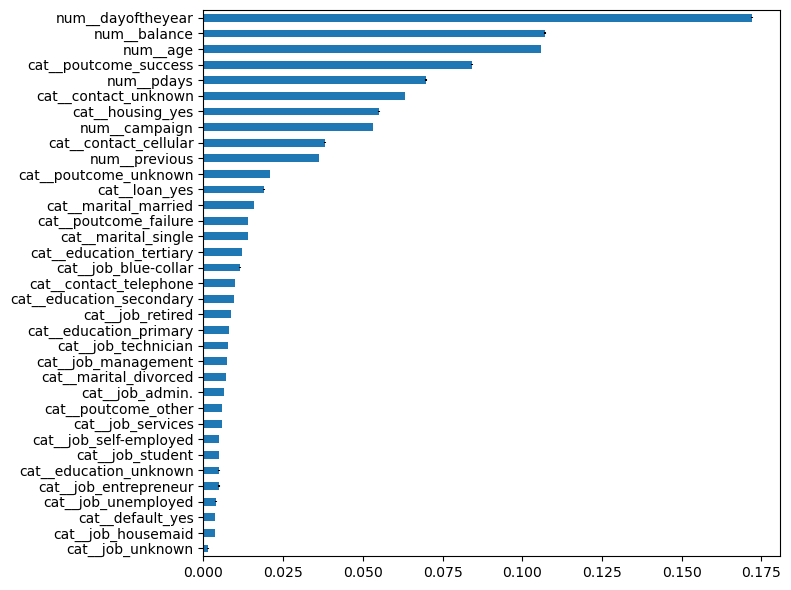

In [63]:
forest_importances = pd.Series(importances, index=rf_clf.named_steps['preprocessing'].get_feature_names_out()).sort_values()

fig, ax = plt.subplots(figsize=(8,6))
forest_importances.plot(kind='barh', yerr=std, ax=ax)
fig.tight_layout()

What is the most important feature?

dayoftheyear

A lot of features have low importance and probably add noise which reduce the performance of the classifier, do a feature selection by recursive elemination to automatically select the subset of features that gives you the best model predictions.

You can have a look at : 

https://scikit-learn.org/stable/modules/feature_selection.html

https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py

RFECV does not use the preprocessing step in the pipeline on the data and throws an error, so I will preprocess the data now

In [66]:
# fit & transform my X_train values
X_train_trans = preprocessor.fit_transform(X_train)
X_test_trans = preprocessor.transform(X_test)

# Convert the transformed NumPy array back to a DataFrame with proper column names
X_train_trans = pd.DataFrame(X_train_trans, columns=preprocessor.get_feature_names_out())
X_test_trans = pd.DataFrame(X_test_trans, columns=preprocessor.get_feature_names_out())

In [69]:
from sklearn.feature_selection import RFECV
rf_clf = RandomForestClassifier(max_depth=13, n_estimators=90, class_weight='balanced_subsample')

rfecv = RFECV(estimator=rf_clf, cv=5, scoring='f1')
rfecv.fit(X_train_trans, y_train)

,estimator,RandomForestC...estimators=90)
,step,1
,min_features_to_select,1
,cv,5
,scoring,'f1'
,verbose,0
,n_jobs,None
,importance_getter,'auto'
,n_estimators,90
,criterion,'gini'
,max_depth,13


In [70]:
print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 9


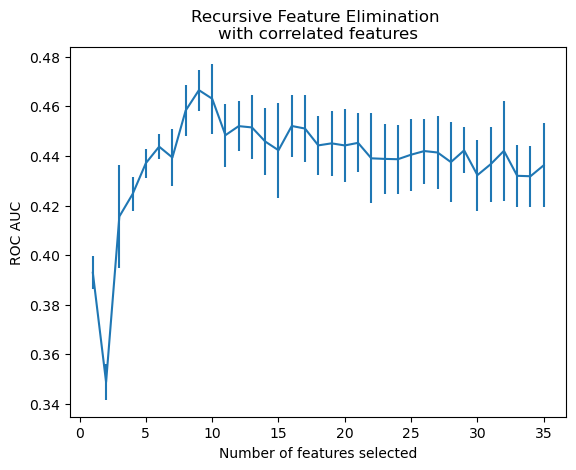

In [71]:
data = {
    key: value
    for key, value in rfecv.cv_results_.items()
    if key in ["n_features", "mean_test_score", "std_test_score"]
}
cv_results = pd.DataFrame(data)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("ROC AUC")
plt.errorbar(
    x=cv_results["n_features"],
    y=cv_results["mean_test_score"],
    yerr=cv_results["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

The features selected for the model are the following:

In [73]:
rfecv.get_feature_names_out()

array(['num__age', 'num__balance', 'num__campaign', 'num__pdays',
       'num__previous', 'num__dayoftheyear', 'cat__housing_yes',
       'cat__contact_unknown', 'cat__poutcome_success'], dtype=object)

In [74]:
rf_clf =  RandomForestClassifier(class_weight='balanced_subsample')

depth = range(5,16,5)
n_est = range(25,101,25)
param_grid =  {'max_depth': depth,
               'n_estimators': n_est}

gs_rf = GridSearchCV(estimator=rf_clf, 
                     param_grid=param_grid, 
                     scoring = 'f1',
                     n_jobs = -1,
                     cv = 5
                    )

gs_rf.fit(X_train_trans[rfecv.get_feature_names_out()], y_train)

,estimator,RandomForestC...ed_subsample')
,param_grid,"{'max_depth': range(5, 16, 5), 'n_estimators': range(25, 101, 25)}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,75


In [75]:
gs_rf_results = pd.DataFrame(gs_rf.cv_results_).sort_values('rank_test_score')
gs_rf_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,5.764611,0.309482,0.133034,0.072427,10,75,"{'max_depth': 10, 'n_estimators': 75}",0.465563,0.475299,0.471842,0.458716,0.458797,0.466043,0.006719,1
7,7.936615,0.432964,0.146539,0.032305,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.460561,0.471079,0.469990,0.456522,0.461369,0.463904,0.005668,2
5,3.858799,0.197600,0.070329,0.019622,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.459660,0.468542,0.466938,0.451064,0.453348,0.459910,0.007004,3
4,1.349892,0.063846,0.035368,0.003853,10,25,"{'max_depth': 10, 'n_estimators': 25}",0.438438,0.466158,0.467036,0.454594,0.465662,0.458377,0.010958,4
10,6.316585,0.552535,0.168233,0.064400,15,75,"{'max_depth': 15, 'n_estimators': 75}",0.445902,0.459530,0.467097,0.443554,0.435604,0.450337,0.011386,5
9,4.499834,0.255890,0.089819,0.020952,15,50,"{'max_depth': 15, 'n_estimators': 50}",0.438961,0.464217,0.467350,0.434899,0.424983,0.446082,0.016746,6
11,8.075000,0.198402,0.156200,0.028673,15,100,"{'max_depth': 15, 'n_estimators': 100}",0.437541,0.456464,0.460841,0.438893,0.434665,0.445681,0.010769,7
8,2.531141,0.369681,0.081215,0.056720,15,25,"{'max_depth': 15, 'n_estimators': 25}",0.429698,0.454602,0.463859,0.435302,0.431321,0.442956,0.013728,8
3,4.618705,0.776280,0.065810,0.005847,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.407550,0.408904,0.412090,0.400870,0.402314,0.406346,0.004177,9
0,1.016856,0.077775,0.027334,0.005050,5,25,"{'max_depth': 5, 'n_estimators': 25}",0.422326,0.403383,0.409933,0.372749,0.405328,0.402744,0.016382,10


We removed the duration feature in our dataset

Read this feature description on the dataset description ([here on data.world](https://data.world/uci/bank-marketing) or [here on kaggle](https://www.kaggle.com/janiobachmann/bank-marketing-dataset)).

How would the previously trained models perform with this feature?

last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

duration would be given a high feature importance because it is highly correlated to the target 


### Continue Ensemble Learning with boosting techniques

Bagging permits to average the results of separated models, whereas the boosting technique trains a classifier and optimizes it in function of its error.

Some information about boosting techniques are on the [sklearn documentation](https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting) but a commonly used library for these techniques is [XGBoost](https://xgboost.readthedocs.io/en/latest/index.html) there are some compatibilities with the sklearn methods (gridsearch, cross validation,...)

- install the `xgboost` package

*Read the articles in resources for a complete explanation.*

In this part a classifier will be trained and evaluated.

In [40]:
# use the same split and seed than you used before
# normally, you have nothing to code here :D 

*Hint:* An example for integrating `XGBoost` with  the `sklearn` tools is available [here](https://medium.com/@juniormiranda_23768/ensemble-methods-tuning-a-xgboost-model-with-scikit-learn-54ff669f988a)

In [76]:
import xgboost as xgb

Let's build a new model than before with a grid search on the `n_estimators` and `max_depth` parameters.

In [78]:
xg_clf = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', xgb.XGBClassifier())
])

depth = range(5,16,5)
n_ins = range(25,101,25)
param_grid =  {'classifier__max_depth': depth,
               'classifier__n_estimators': n_ins}

gs_xg = GridSearchCV(estimator=xg_clf, 
                     param_grid=param_grid, 
                     scoring = 'f1',
                     n_jobs = -1,
                     cv = 5
                    )

gs_xg.fit(X_train, y_train)

,estimator,"Pipeline(step...=None, ...))])"
,param_grid,"{'classifier__max_depth': range(5, 16, 5), 'classifier__n_estimators': range(25, 101, 25)}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [79]:
gs_xg_results = pd.DataFrame(gs_xg.cv_results_).sort_values('rank_test_score')
gs_xg_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__max_depth,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,1.899331,0.149602,0.136946,0.019104,10,100,"{'classifier__max_depth': 10, 'classifier__n_e...",0.352649,0.394979,0.381679,0.366438,0.350087,0.369166,0.017130,1
6,2.052997,0.186218,0.159442,0.045632,10,75,"{'classifier__max_depth': 10, 'classifier__n_e...",0.360134,0.394581,0.367836,0.361279,0.353553,0.367477,0.014290,2
5,1.046818,0.073166,0.102247,0.023286,10,50,"{'classifier__max_depth': 10, 'classifier__n_e...",0.358586,0.395904,0.361279,0.355009,0.359198,0.365995,0.015090,3
3,0.995631,0.023057,0.086800,0.006951,5,100,"{'classifier__max_depth': 5, 'classifier__n_es...",0.357204,0.396537,0.385841,0.358559,0.322049,0.364038,0.025966,4
11,2.127651,0.336517,0.158496,0.038685,15,100,"{'classifier__max_depth': 15, 'classifier__n_e...",0.360134,0.377872,0.358459,0.366079,0.357504,0.364010,0.007545,5
2,0.821327,0.026309,0.083100,0.004947,5,75,"{'classifier__max_depth': 5, 'classifier__n_es...",0.356212,0.394391,0.380195,0.358559,0.327507,0.363373,0.022829,6
10,2.172540,0.077824,0.169810,0.069436,15,75,"{'classifier__max_depth': 15, 'classifier__n_e...",0.352645,0.378059,0.353638,0.368997,0.361792,0.363026,0.009582,7
4,0.772625,0.023509,0.079244,0.010991,10,25,"{'classifier__max_depth': 10, 'classifier__n_e...",0.355252,0.382253,0.384615,0.343525,0.341941,0.361517,0.018491,8
9,1.416774,0.015542,0.106831,0.008393,15,50,"{'classifier__max_depth': 15, 'classifier__n_e...",0.361204,0.388465,0.352340,0.356351,0.346416,0.360955,0.014585,9
8,1.105644,0.167925,0.131406,0.102935,15,25,"{'classifier__max_depth': 15, 'classifier__n_e...",0.354949,0.381523,0.351211,0.359415,0.351536,0.359727,0.011292,10


Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [81]:
# Test metrics
y_test_pred = gs_xg.predict(X_test)

print('F1 Score:', f1_score(y_test, y_test_pred))

F1 Score: 0.35650446871896724


In [110]:
gs_xg.best_estimator_[1].get_booster().feature_names = gs_xg.best_estimator_[0].get_feature_names_out().tolist()

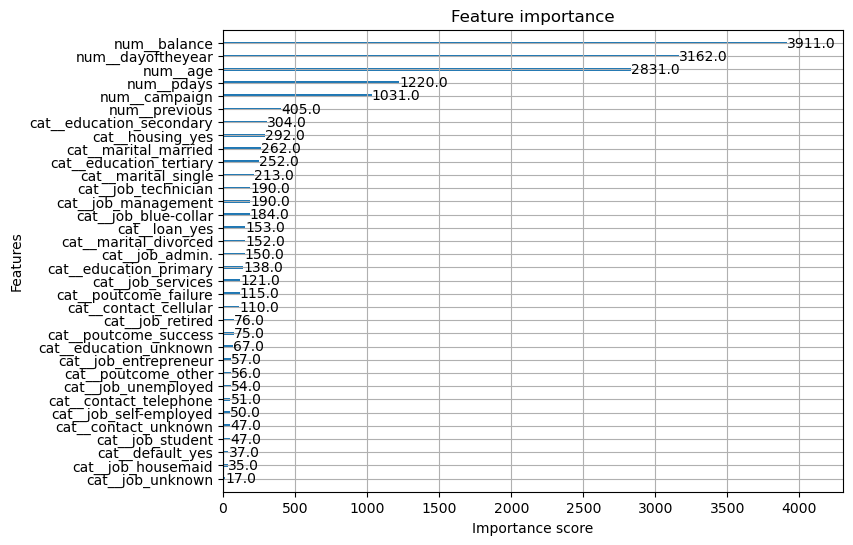

In [114]:
# performance curves
fig, ax = plt.subplots(figsize=(8,6))
xgb.plot_importance(gs_xg.best_estimator_[1],ax=ax)
plt.show()

## Let's Conclude

Report your test set metrics for the three methods here

In [115]:
# Decision Tree on test set
model_dt = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=5, class_weight='balanced'))
])

model_dt.fit(X_train, y_train)
y_pred_test = model_dt.predict(X_test)
y_pred_train = model_dt.predict(X_train)

print("F1 Score - Train:", f1_score(y_train, y_pred_train))
print("F1 Score - Test:", f1_score(y_test, y_pred_test))

F1 Score - Train: 0.44201702019560524
F1 Score - Test: 0.42500930405656867


In [ ]:
# Random forest on test set
model_dt = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators = 90, max_depth = 13, class_weight = 'balanced_subsample'))
])

model_dt.fit(X_train, y_train)
y_pred_test = model_dt.predict(X_test)
y_pred_train = model_dt.predict(X_train)

print("F1 Score - Train:", f1_score(y_train, y_pred_train))
print("F1 Score - Test:", f1_score(y_test, y_pred_test))

F1 Score - Train: 0.5927664568441268
F1 Score - Test: 0.4510939510939511


In [117]:
# XGBoost on test set
model_dt = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', xgb.XGBClassifier(n_estimators = 100, max_depth = 10))
])

model_dt.fit(X_train, y_train)
y_pred_test = model_dt.predict(X_test)
y_pred_train = model_dt.predict(X_train)

print("F1 Score - Train:", f1_score(y_train, y_pred_train))
print("F1 Score - Test:", f1_score(y_test, y_pred_test))

F1 Score - Train: 0.858092485549133
F1 Score - Test: 0.35650446871896724


What do you notice? What are you real conclusion about the dataset? What should you tell the client about the dataset and his problem?

The ensemble methods seem to give better results than simple models. The bagging method (random forest) seems to give the best results. Also, I think the results could be improved for the boosting if I balanced the data. All of the methods could probably be improved further if a more detailed grid search was performed.

- Write your memo about bagging and boosting method in a cell below.
- Which model would you choose for the bank, and why? Which precautions?

you can add your models result visualization in this cell if it helps you explaining your conclusions.

Bagging is an ensemble method that trains the data on different models in parallel and then averages the results between the models (such as in a random forest). Bagging is used to avoid overfitting and reduce variance in a model. 

Boosting is an ensemble method that trains the data on different models in series. Boosting is used to improve bad models by improving fitting and reducing bias.

## To go further

### Build a customized bagging classifier (Optional) 

- Use a different classification model you have seen until now and build a new classifier based on the [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier) to create and train an new model.
- Use differents classification models and use the [VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier) to create and train a new model.

In [ ]:
# Write your code here

## Rebalance the data if you haven't done it yet

Before going through the modelling phase, let's see the label distribution :

Use the `value_counts` function and the appropriate visualization for displaying the label distribution

In [ ]:
# code here

What do you notice?

*answer here*

The easiest way to rebalance your data is to add the `class_weight='balanced'` parameter to your scikit learn model. The `class_weight` parameter is available in most scikit-learn models, for example look at the Decision Trees doc :
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

(There are other techniques for rebalancing the data [here](https://blog.octo.com/donnees-desequilibrees-que-faire/), [here](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/) and [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) ).

Rebalance the data with the `class_weight` parameter, and you'll have much better f1 and Average Precision metrics.

In [ ]:
# code here